In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

plt.rcParams['font.size'] = 15
plt.rcParams['font.weight'] ='bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 15

# Electrophysiology
## The Hodgkin-Huxley model
IBM3101 - Francisco Sahli

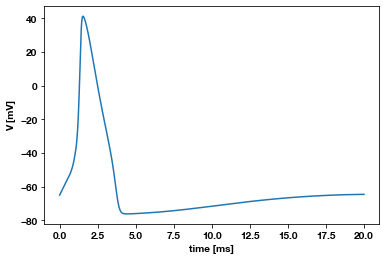

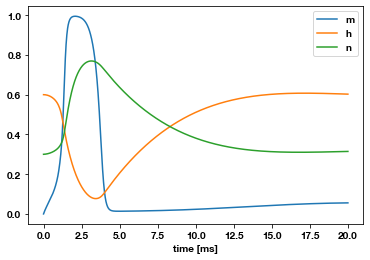

In [18]:
def Iext(t, tstart, duration, amplitude, period):
    return (tstart <= (t % period) <= (tstart + duration))*amplitude

def HHmodel(Y,t,tstart, duration, amplitude, period):
    Iapp = Iext(t, tstart, duration, amplitude, period)
    V, m, h, n = Y

    C_m  =   1.0

    g_Na = 120.0
    g_K  =  36.0
    g_L  =   0.3

    E_Na =  50.0
    E_K  = -77.0
    E_L  = -54.387

    alpha_m = 0.1*(V+40.0)/(1.0 - np.exp(-(V+40.0) / 10.0))
    beta_m = 4.0*np.exp(-(V+65.0) / 18.0)

    alpha_h = 0.07*np.exp(-(V+65.0) / 20.0)
    beta_h = 1.0/(1.0 + np.exp(-(V+35.0) / 10.0))

    alpha_n = 0.01*(V+55.0)/(1.0 - np.exp(-(V+55.0) / 10.0))
    beta_n = 0.125*np.exp(-(V+65) / 80.0)

    I_Na = g_Na * m**3 * h * (V - E_Na)
    I_K = g_K  * n**4 * (V - E_K)
    I_L = g_L * (V - E_L)

    dVdt = (Iapp - I_Na - I_K - I_L)/C_m
    dmdt = alpha_m*(1.0-m) - beta_m*m
    dhdt = alpha_h*(1.0-h) - beta_h*h
    dndt = alpha_n*(1.0-n) - beta_n*n

    return [dVdt, dmdt, dhdt, dndt]


Y0 = [-65, 0.0, 0.6, 0.3]

tstart = 0.0
duration = 1
amplitude = 20
period = 100

time = np.linspace(0,20,2000)

Y = odeint(HHmodel, Y0, time, args = (tstart, duration, amplitude, period))

plt.plot(time, Y[:,0])
plt.xlabel('time [ms]')
plt.ylabel('V [mV]')

plt.figure()
plt.plot(time, Y[:,1], label = 'm')
plt.plot(time, Y[:,2], label = 'h')
plt.plot(time, Y[:,3], label = 'n')

plt.xlabel('time [ms]')

plt.legend()


Plot the other 3 variables and explain their contributions

## Oscillations

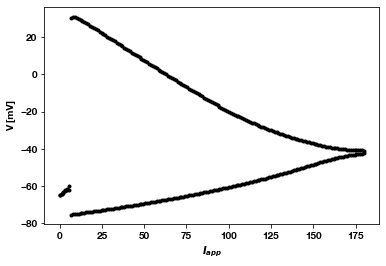

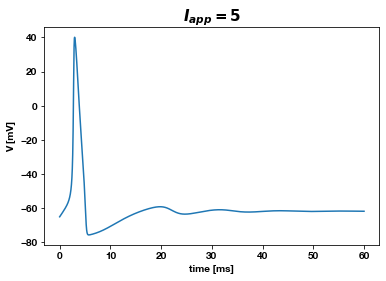

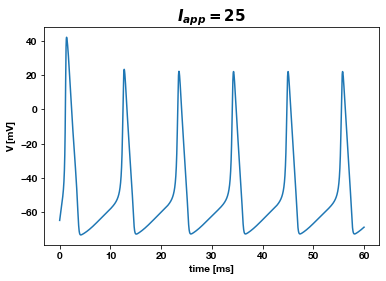

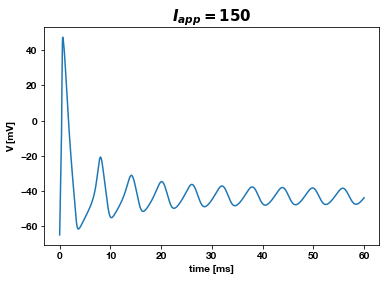

In [13]:
amplitudes = np.linspace(0,180, 161)

tstart = 0.0
duration = 1000
period = 100
time = np.linspace(0,60,6000)
for amplitude in amplitudes:
    Y = odeint(HHmodel, Y0, time, args = (tstart, duration, amplitude, period))
    Vmin = Y[3000:,0].min()
    Vmax = Y[3000:,0].max()
    plt.plot([amplitude, amplitude], [Vmin, Vmax], 'k.')

plt.ylabel('V [mV]')
plt.xlabel('$I_{app}$')

amplitude_plots = [5, 25, 150]
for amplitude in amplitude_plots:
    plt.figure()
    Y = odeint(HHmodel, Y0, time, args = (tstart, duration, amplitude, period))
    plt.plot(time, Y[:,0])
    plt.xlabel('time [ms]')
    plt.ylabel('V [mV]')
    plt.title('$I_{app} = %d$' % amplitude)
